# Bitcoin analysis
---

## Table of contents
1. [Introduction](#introduction)
2. [Series of data](#series)
3. [DataFrames](#dframes)
4. [Visualization Tools](#viz)
5. [Pandas-datareader](#pdr)
6. [Simple Calculations - Volatility, SMA, and EMA](#simple-calc)
7. [MACD and Stochastic](#macdnstoch)

## Part 1 - Introduction <a name="introduction"></a>
- Read data from CSV 
- Data types used in the file
- Set index to date
- Parse date as index
- Use index with loc
- Use indexing with iloc

In [25]:
import pandas as pd

In [43]:
# The date is used as the index to have a better data navigation
data = pd.read_csv("../data/BTCUSD_day.csv", index_col=0, parse_dates=True)
data = data.reindex(index=data.index[::-1])  # Reorders the indexes of the csv.
data.head()

,Symbol,Open,High,Low,Close,Volume BTC,Volume USD
Date,,,,,,,
2015-10-08,BTCUSD,242.50,245.00,242.5,243.95,18.80,4595.84
2015-10-09,BTCUSD,243.95,249.97,243.6,245.39,30.99,7651.63
2015-10-10,BTCUSD,245.39,246.30,244.6,246.30,12.17,2984.44
2015-10-11,BTCUSD,246.30,249.50,246.3,249.50,12.22,3021.12
2015-10-12,BTCUSD,249.50,249.50,247.6,247.60,38.28,9493.89


In [44]:
data.dtypes

Symbol         object
Open          float64
High          float64
Low           float64
Close         float64
Volume BTC    float64
Volume USD    float64
dtype: object

In [45]:
data.index

DatetimeIndex(['2015-10-08', '2015-10-09', '2015-10-10', '2015-10-11',
               '2015-10-12', '2015-10-13', '2015-10-14', '2015-10-15',
               '2015-10-16', '2015-10-17',
               ...
               '2020-04-01', '2020-04-02', '2020-04-03', '2020-04-04',
               '2020-04-05', '2020-04-06', '2020-04-07', '2020-04-08',
               '2020-04-09', '2020-04-10'],
              dtype='datetime64[ns]', name='Date', length=1647, freq=None)

In [47]:
data.loc[:'2017-01-01']

,Symbol,Open,High,Low,Close,Volume BTC,Volume USD
Date,,,,,,,
2015-10-08,BTCUSD,242.50,245.00,242.50,243.95,18.80,4595.84
2015-10-09,BTCUSD,243.95,249.97,243.60,245.39,30.99,7651.63
2015-10-10,BTCUSD,245.39,246.30,244.60,246.30,12.17,2984.44
2015-10-11,BTCUSD,246.30,249.50,246.30,249.50,12.22,3021.12
2015-10-12,BTCUSD,249.50,249.50,247.60,247.60,38.28,9493.89
...,...,...,...,...,...,...,...
2016-12-28,BTCUSD,932.65,981.92,932.48,981.92,2510.09,2412458.09
2016-12-29,BTCUSD,981.92,985.43,950.30,978.57,1914.21,1850466.14
2016-12-30,BTCUSD,978.57,978.57,929.90,966.71,1629.33,1558808.10


In [30]:
data.iloc[0] # first data

Symbol         BTCUSD
Open          7315.25
High          7315.25
Low           7315.25
Close         7315.25
Volume BTC        0.0
Volume USD        0.0
Name: 2020-04-10 00:00:00, dtype: object

In [31]:
data.iloc[-1] #last data

Symbol         BTCUSD
Open            242.5
High            245.0
Low             242.5
Close          243.95
Volume BTC       18.8
Volume USD    4595.84
Name: 2015-10-08 00:00:00, dtype: object

## Part 2 - Series <a name="series"></a>
- Use type to get datatype
- Each column is a Series
- Series show data type (dtype), they can contain only one data type. This constraint allows faster calculations
- Calculate with Series
    - Daily change
    - Daily percentage change
    - Normalized data (gains per day from day 0 to last recorded dataframe)
- Indexing with Series of data


In [33]:
type(data)

pandas.core.frame.DataFrame

In [32]:
data['Open']

Date
2020-04-10    7315.25
2020-04-09    7369.60
2020-04-08    7201.81
2020-04-07    7336.96
2020-04-06    6775.21
               ...   
2015-10-12     249.50
2015-10-11     246.30
2015-10-10     245.39
2015-10-09     243.95
2015-10-08     242.50
Name: Open, Length: 1647, dtype: float64

Difference between opening and closing prices

In [37]:
daily_chg = data['Close'] - data['Open']

In [38]:
daily_chg

Date
2020-04-10      0.00
2020-04-09     54.35
2020-04-08   -167.79
2020-04-07    135.15
2020-04-06   -561.75
               ...  
2015-10-12      1.90
2015-10-11     -3.20
2015-10-10     -0.91
2015-10-09     -1.44
2015-10-08     -1.45
Length: 1647, dtype: float64

In [48]:
# Calculate daily percentage change
daily_pct_chg = (data['Close'] - data['Open'])/data['Open']*100 
daily_pct_chg

Date
2015-10-08    0.597938
2015-10-09    0.590285
2015-10-10    0.370838
2015-10-11    1.299229
2015-10-12   -0.761523
                ...   
2020-04-06    8.291256
2020-04-07   -1.842044
2020-04-08    2.329831
2020-04-09   -0.737489
2020-04-10    0.000000
Length: 1647, dtype: float64

In [49]:
normalized = data['Close']/data['Close'].iloc[0]
normalized

Date
2015-10-08     1.000000
2015-10-09     1.005903
2015-10-10     1.009633
2015-10-11     1.022751
2015-10-12     1.014962
                ...    
2020-04-06    30.075671
2020-04-07    29.521664
2020-04-08    30.209469
2020-04-09    29.986678
2020-04-10    29.986678
Name: Close, Length: 1647, dtype: float64

In [52]:
# Calculate gains from day 0 to last point of data using the normalized values
data['Close'].iloc[0]*normalized.iloc[-1] 

7315.25

In [53]:
data['Close'].iloc[-1] # Last price recorded, there was a gain of 3000%

7315.25

## Part 3. DataFrames <a name="dframes"></a>
- Calculate with columns
- Create new columbns
- Drop columns
- Min, Max, Argmin and Argmax
- Mean

In [54]:
data.head()

,Symbol,Open,High,Low,Close,Volume BTC,Volume USD
Date,,,,,,,
2015-10-08,BTCUSD,242.50,245.00,242.5,243.95,18.80,4595.84
2015-10-09,BTCUSD,243.95,249.97,243.6,245.39,30.99,7651.63
2015-10-10,BTCUSD,245.39,246.30,244.6,246.30,12.17,2984.44
2015-10-11,BTCUSD,246.30,249.50,246.3,249.50,12.22,3021.12
2015-10-12,BTCUSD,249.50,249.50,247.6,247.60,38.28,9493.89


In [56]:
data['Daily chg'] = data['Close'] - data['Open']
data.head()

,Symbol,Open,High,Low,Close,Volume BTC,Volume USD,Daily chg
Date,,,,,,,,
2015-10-08,BTCUSD,242.50,245.00,242.5,243.95,18.80,4595.84,1.45
2015-10-09,BTCUSD,243.95,249.97,243.6,245.39,30.99,7651.63,1.44
2015-10-10,BTCUSD,245.39,246.30,244.6,246.30,12.17,2984.44,0.91
2015-10-11,BTCUSD,246.30,249.50,246.3,249.50,12.22,3021.12,3.20
2015-10-12,BTCUSD,249.50,249.50,247.6,247.60,38.28,9493.89,-1.90


In [57]:
data['Normalized'] = data['Close']/data['Close'].iloc[0]

In [58]:
data.head()

,Symbol,Open,High,Low,Close,Volume BTC,Volume USD,Daily chg,Normalized
Date,,,,,,,,,
2015-10-08,BTCUSD,242.50,245.00,242.5,243.95,18.80,4595.84,1.45,1.000000
2015-10-09,BTCUSD,243.95,249.97,243.6,245.39,30.99,7651.63,1.44,1.005903
2015-10-10,BTCUSD,245.39,246.30,244.6,246.30,12.17,2984.44,0.91,1.009633
2015-10-11,BTCUSD,246.30,249.50,246.3,249.50,12.22,3021.12,3.20,1.022751
2015-10-12,BTCUSD,249.50,249.50,247.6,247.60,38.28,9493.89,-1.90,1.014962


In [59]:
data.tail()

,Symbol,Open,High,Low,Close,Volume BTC,Volume USD,Daily chg,Normalized
Date,,,,,,,,,
2020-04-06,BTCUSD,6775.21,7369.76,6771.01,7336.96,3727.47,26533750.17,561.75,30.075671
2020-04-07,BTCUSD,7336.96,7468.42,7078.00,7201.81,2333.34,17047120.32,-135.15,29.521664
2020-04-08,BTCUSD,7201.81,7432.23,7152.80,7369.60,2483.60,18138080.27,167.79,30.209469
2020-04-09,BTCUSD,7369.60,7378.85,7115.04,7315.25,2237.13,16310014.53,-54.35,29.986678
2020-04-10,BTCUSD,7315.25,7315.25,7315.25,7315.25,0.00,0.00,0.00,29.986678


In [66]:
ltf = data['Close'].loc['2017-05-01': '2019-01-01']
print("Minimum closing price ", tf.min())
print("Maximum closing price ", tf.max())

Minimum closing price  1440.82
Maximum closing price  19499.99


In [69]:
ltf.argmax()

229

In [71]:
data.loc['2017-05-01': '2019-01-01'].iloc[229]

Symbol             BTCUSD
Open              17744.5
High              19739.0
Low              17713.87
Close            19499.99
Volume BTC        5081.35
Volume USD    95278934.42
Daily chg         1755.49
Normalized      79.934372
Name: 2017-12-16 00:00:00, dtype: object

### Drop a column

In [73]:
data.drop(labels=['High', 'Low', 'Close', 'Volume USD'], axis=1)

,Symbol,Open,Volume BTC,Daily chg,Normalized
Date,,,,,
2015-10-08,BTCUSD,242.50,18.80,1.45,1.000000
2015-10-09,BTCUSD,243.95,30.99,1.44,1.005903
2015-10-10,BTCUSD,245.39,12.17,0.91,1.009633
2015-10-11,BTCUSD,246.30,12.22,3.20,1.022751
2015-10-12,BTCUSD,249.50,38.28,-1.90,1.014962
...,...,...,...,...,...
2020-04-06,BTCUSD,6775.21,3727.47,561.75,30.075671
2020-04-07,BTCUSD,7336.96,2333.34,-135.15,29.521664
2020-04-08,BTCUSD,7201.81,2483.60,167.79,30.209469


## Part 4 - Data Visualization w/ Matplotlib <a name="viz"></a>

In [1]:
import pandas as pd

In [2]:
data = pd.read_csv("../data/BTCUSD_day.csv", index_col=0, parse_dates=True)

In [20]:
data.head()

,Symbol,Open,High,Low,Close,Volume BTC,Volume USD
Date,,,,,,,
2020-04-10,BTCUSD,7315.25,7315.25,7315.25,7315.25,0.00,0.00
2020-04-09,BTCUSD,7369.60,7378.85,7115.04,7315.25,2237.13,16310014.53
2020-04-08,BTCUSD,7201.81,7432.23,7152.80,7369.60,2483.60,18138080.27
2020-04-07,BTCUSD,7336.96,7468.42,7078.00,7201.81,2333.34,17047120.32
2020-04-06,BTCUSD,6775.21,7369.76,6771.01,7336.96,3727.47,26533750.17


<AxesSubplot:xlabel='Date'>

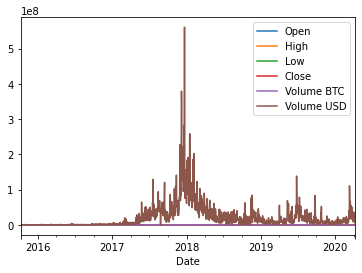

In [4]:
data.plot() # not great way to do it

In [5]:
import matplotlib.pyplot as plt
%matplotlib notebook

<IPython.core.display.Javascript object>


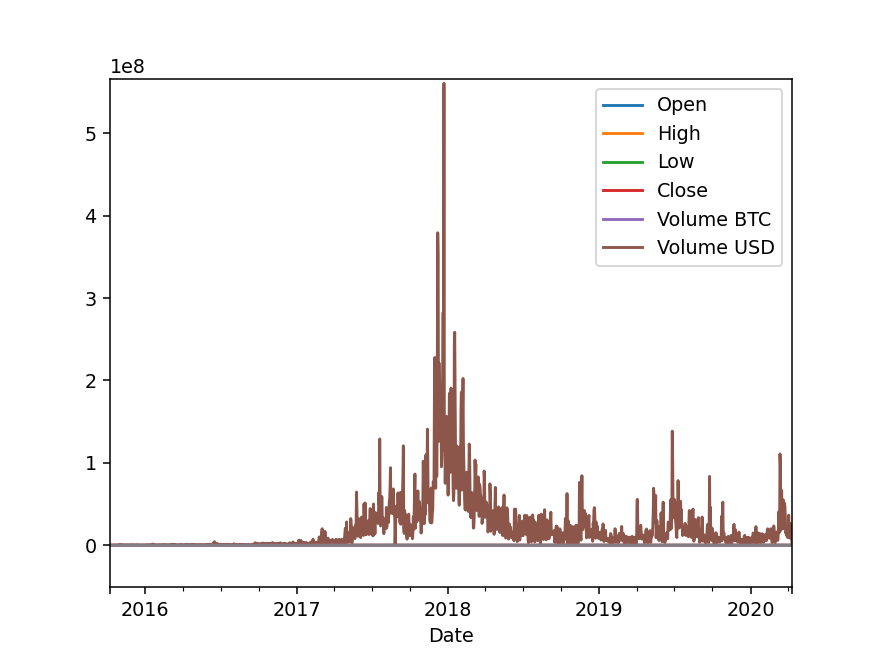

<AxesSubplot:xlabel='Date'>

In [6]:
data.plot()

In [8]:
data['Close'].plot()

<AxesSubplot:xlabel='Date'>

<IPython.core.display.Javascript object>


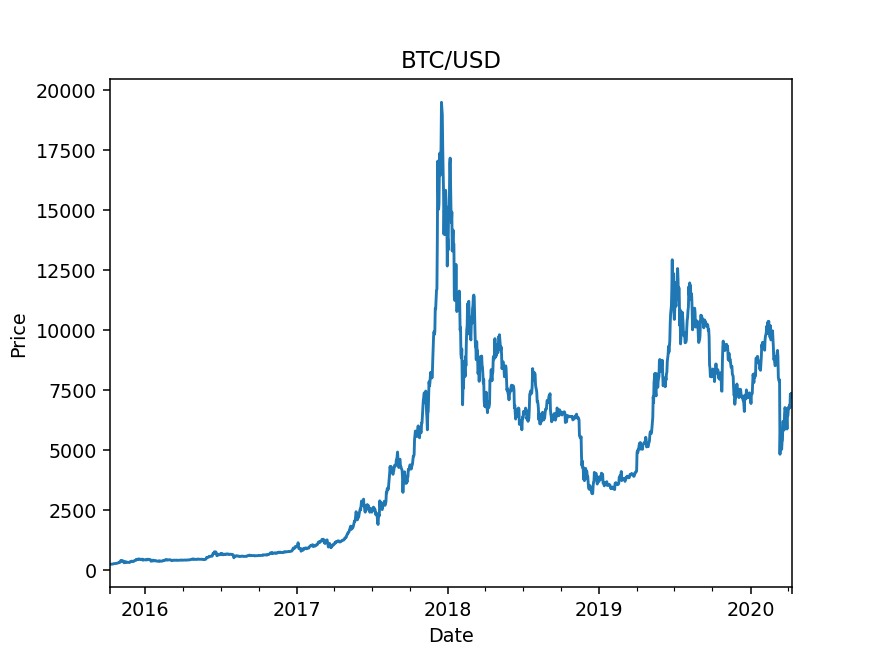

Text(0.5, 1.0, 'BTC/USD')

In [12]:
fig, ax = plt.subplots()
data['Close'].plot(ax=ax)
ax.set_ylabel("Price")
ax.set_title("BTC/USD")

<IPython.core.display.Javascript object>


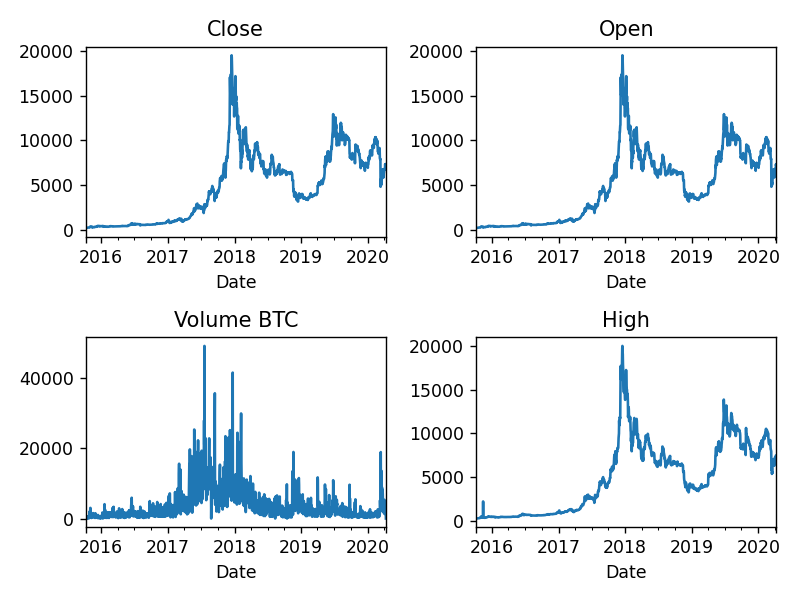

In [23]:
fig, ax = plt.subplots(2,2)
data['Close'].plot(ax=ax[0][0], title='Close')
data['Open'].plot(ax=ax[0][1], title='Open')
data['Volume BTC'].plot(ax=ax[1][0], title='Volume BTC')
data['High'].plot(ax=ax[1][1], title='High')

plt.tight_layout()

<IPython.core.display.Javascript object>


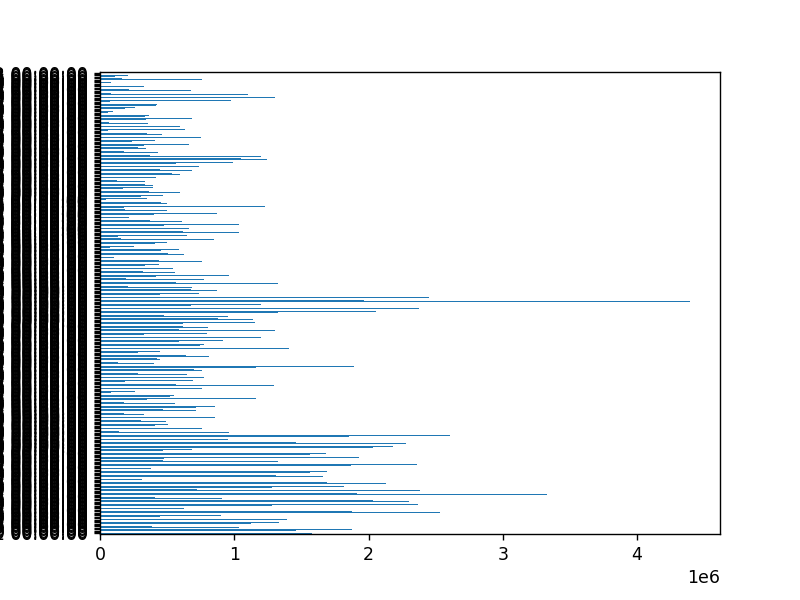

<AxesSubplot:ylabel='Date'>

In [32]:
fig, ax = plt.subplots()
data['Volume USD'].loc['2016-01-01':'2016-12-01'].plot.barh(ax=ax)

# Pandas-datareader <a name="pdr"></a>

In [35]:
!pip install pandas_datareader

     |████████████████████████████████| 107 kB 607 kB/s eta 0:00:01
     |████████████████████████████████| 6.3 MB 1.6 MB/s eta 0:00:01
  Using cached requests-2.25.1-py2.py3-none-any.whl (61 kB)
  Using cached idna-2.10-py2.py3-none-any.whl (58 kB)
  Using cached certifi-2021.5.30-py2.py3-none-any.whl (145 kB)
  Using cached chardet-4.0.0-py2.py3-none-any.whl (178 kB)
  Using cached urllib3-1.26.6-py2.py3-none-any.whl (138 kB)


In [50]:
!pip install yfinance

Using legacy 'setup.py install' for yfinance, since package 'wheel' is not installed.
Using legacy 'setup.py install' for multitasking, since package 'wheel' is not installed.
    Running setup.py install for multitasking ... done
    Running setup.py install for yfinance ... done


In [104]:
import pandas as pd
from pandas_datareader import data as pdr
import datetime as dt
import yfinance as yfin
yfin.pdr_override()

In [105]:
ticker = "BTC-USD"
start = dt.datetime(2019,1,1)
data = pdr.get_data_yahoo(ticker, start)

[*********************100%***********************]  1 of 1 completed


In [57]:
data.tail()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2021-07-02,33549.601562,33939.589844,32770.679688,33897.046875,33897.046875,38728974942
2021-07-03,33854.421875,34909.261719,33402.695312,34668.546875,34668.546875,24383958643
2021-07-04,34665.566406,35937.566406,34396.476562,35287.781250,35287.781250,24924307911
2021-07-05,35284.343750,35284.343750,33213.660156,33746.003906,33746.003906,26721554282
2021-07-07,34153.878906,34363.257812,34153.878906,34363.257812,34363.257812,26549024768


# Simple Calculations - Volatility, SMA, and EMA  <a name="simple-calc"></a>

## Calculating simple
- Pct change
- Log returns
- Standard deviation (Volatility)
- Rolling
    - Simple Moving Average
    - Exponential Moving Average

### Standard deviation
p stands for period
- $\sigma_{p} = \sigma_{daily} \times \sqrt{p}$
- $\sigma_{annually} = \sigma_{daily} \times \sqrt{252}$

(252 trading days per year for stocks) - Cryptos trade all year

In [63]:
import numpy as np

In [60]:
# Calculates the %change between closing prices of the next dataframe (in this case day).
data['%-chg'] = data['Close'].pct_change()

In [61]:
data.head()

,Open,High,Low,Close,Adj Close,Volume,%-chg
Date,,,,,,,
2019-01-01,3746.713379,3850.913818,3707.231201,3843.520020,3843.520020,4324200990,NaN
2019-01-02,3849.216309,3947.981201,3817.409424,3943.409424,3943.409424,5244856836,0.025989
2019-01-03,3931.048584,3935.685059,3826.222900,3836.741211,3836.741211,4530215219,-0.027050
2019-01-04,3832.040039,3865.934570,3783.853760,3857.717529,3857.717529,4847965467,0.005467
2019-01-05,3851.973877,3904.903076,3836.900146,3845.194580,3845.194580,5137609824,-0.003246


In [64]:
# Calculate the log returns
data['Log returns'] = np.log(data['Close']/data['Close'].shift())

In [67]:
data.head()

,Open,High,Low,Close,Adj Close,Volume,%-chg,Log returns
Date,,,,,,,,
2019-01-01,3746.713379,3850.913818,3707.231201,3843.520020,3843.520020,4324200990,NaN,NaN
2019-01-02,3849.216309,3947.981201,3817.409424,3943.409424,3943.409424,5244856836,0.025989,0.025657
2019-01-03,3931.048584,3935.685059,3826.222900,3836.741211,3836.741211,4530215219,-0.027050,-0.027422
2019-01-04,3832.040039,3865.934570,3783.853760,3857.717529,3857.717529,4847965467,0.005467,0.005452
2019-01-05,3851.973877,3904.903076,3836.900146,3845.194580,3845.194580,5137609824,-0.003246,-0.003251


In [68]:
data['Log returns'].std()

0.04025795870616819

In [74]:
volatility = data['Log returns'].std()*360**.5

In [75]:
volatility

0.7638410607629806

In [80]:
str_vol = str(round(volatility,5)*100)

In [81]:
str_vol

'76.384'

<IPython.core.display.Javascript object>


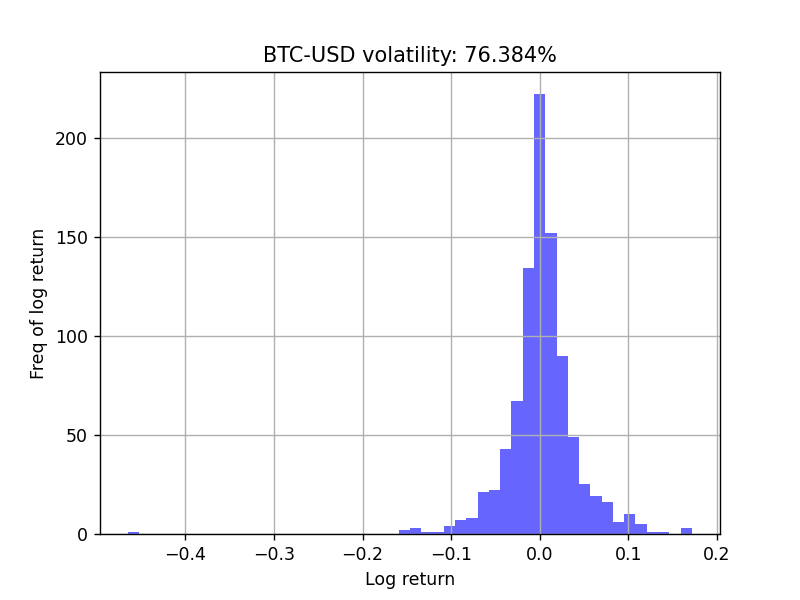

Text(0.5, 1.0, 'BTC-USD volatility: 76.384%')

In [83]:
fig, ax = plt.subplots()
data['Log returns'].hist(ax=ax, bins=50, alpha=0.6, color='b')
ax.set_xlabel("Log return")
ax.set_ylabel("Freq of log return")
ax.set_title("BTC-USD volatility: "+ str_vol + "%")

In [84]:
data.head()

,Open,High,Low,Close,Adj Close,Volume,%-chg,Log returns
Date,,,,,,,,
2019-01-01,3746.713379,3850.913818,3707.231201,3843.520020,3843.520020,4324200990,NaN,NaN
2019-01-02,3849.216309,3947.981201,3817.409424,3943.409424,3943.409424,5244856836,0.025989,0.025657
2019-01-03,3931.048584,3935.685059,3826.222900,3836.741211,3836.741211,4530215219,-0.027050,-0.027422
2019-01-04,3832.040039,3865.934570,3783.853760,3857.717529,3857.717529,4847965467,0.005467,0.005452
2019-01-05,3851.973877,3904.903076,3836.900146,3845.194580,3845.194580,5137609824,-0.003246,-0.003251


In [87]:
data['Close'].rolling(2).sum()

Date
2019-01-01             NaN
2019-01-02     7786.929443
2019-01-03     7780.150635
2019-01-04     7694.458740
2019-01-05     7702.912109
                  ...     
2021-07-02    67469.164062
2021-07-03    68565.593750
2021-07-04    69956.328125
2021-07-05    69033.785156
2021-07-07    68109.261719
Name: Close, Length: 914, dtype: float64

In [90]:
data['MA10'] = data['Close'].rolling(10).mean()
data['MA50'] = data['Close'].rolling(50).mean()

In [91]:
data.tail()

,Open,High,Low,Close,Adj Close,Volume,%-chg,Log returns,MA10,MA50
Date,,,,,,,,,,
2021-07-02,33549.601562,33939.589844,32770.679688,33897.046875,33897.046875,38728974942,0.009679,0.009632,33967.127930,37158.572266
2021-07-03,33854.421875,34909.261719,33402.695312,34668.546875,34668.546875,24383958643,0.022760,0.022505,34061.679883,36854.332500
2021-07-04,34665.566406,35937.566406,34396.476562,35287.781250,35287.781250,24924307911,0.017862,0.017704,34124.214258,36624.884375
2021-07-05,35284.343750,35284.343750,33213.660156,33746.003906,33746.003906,26721554282,-0.043692,-0.044675,34335.036719,36370.683281
2021-07-07,34153.878906,34363.257812,34153.878906,34363.257812,34363.257812,26549024768,0.018291,0.018126,34552.734766,36187.198203


In [93]:
data['EMA10'] = data['Close'].ewm(span=10, adjust=False).mean()

In [94]:
data.tail()

,Open,High,Low,Close,Adj Close,Volume,%-chg,Log returns,MA10,MA50,EMA10
Date,,,,,,,,,,,
2021-07-02,33549.601562,33939.589844,32770.679688,33897.046875,33897.046875,38728974942,0.009679,0.009632,33967.127930,37158.572266,34305.373283
2021-07-03,33854.421875,34909.261719,33402.695312,34668.546875,34668.546875,24383958643,0.022760,0.022505,34061.679883,36854.332500,34371.404846
2021-07-04,34665.566406,35937.566406,34396.476562,35287.781250,35287.781250,24924307911,0.017862,0.017704,34124.214258,36624.884375,34538.018737
2021-07-05,35284.343750,35284.343750,33213.660156,33746.003906,33746.003906,26721554282,-0.043692,-0.044675,34335.036719,36370.683281,34394.016041
2021-07-07,34153.878906,34363.257812,34153.878906,34363.257812,34363.257812,26549024768,0.018291,0.018126,34552.734766,36187.198203,34388.423636


<IPython.core.display.Javascript object>


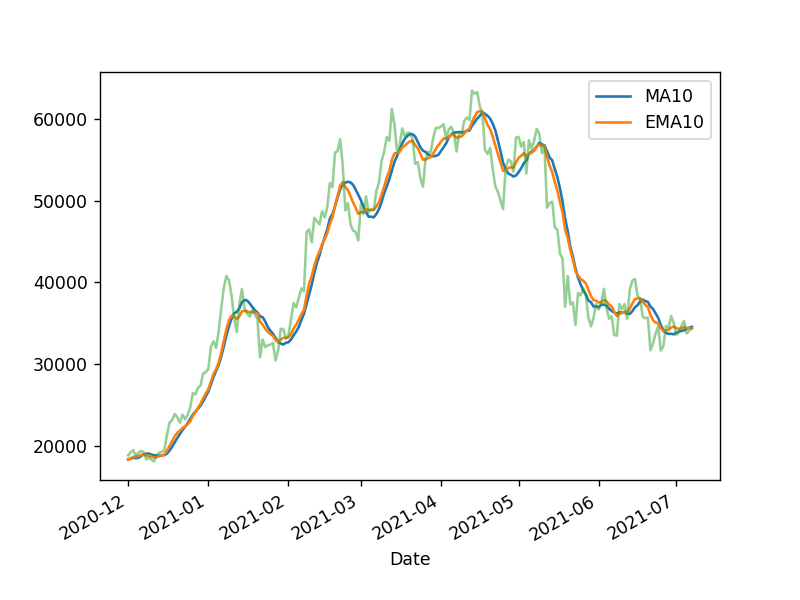

<AxesSubplot:xlabel='Date'>

In [95]:
fig, ax = plt.subplots()
data[['MA10', 'EMA10']].loc['2020-12-01':].plot(ax=ax)
data['Close'].loc['2020-12-01':].plot(ax=ax, alpha=0.5)

# MACD and Stochastic <a name="macdnstoch"></a>

## MACD
- MACD  is a lagging indicator when trading on the corssovers
- https://www.investopedia.com/terms/m/macd.asp

**Calculation** (12-26-9 MACD(default))

- MACD=12-Period EMA - 26-Period EMA
- Signal line 9-Period EMA of MACD

In [6]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib notebook

In [12]:
# The date is used as the index to have a better data navigation
data = pd.read_csv("/home/amaru-razerblade/bigdata-crypto/datos/BTCUSD_day.csv", index_col=0, parse_dates=True)
data = data.reindex(index=data.index[::-1])  # Reorders the indexes of the csv.
data.head()

,Symbol,Open,High,Low,Close,Volume BTC,Volume USD
Date,,,,,,,
2015-10-08,BTCUSD,242.50,245.00,242.5,243.95,18.80,4595.84
2015-10-09,BTCUSD,243.95,249.97,243.6,245.39,30.99,7651.63
2015-10-10,BTCUSD,245.39,246.30,244.6,246.30,12.17,2984.44
2015-10-11,BTCUSD,246.30,249.50,246.3,249.50,12.22,3021.12
2015-10-12,BTCUSD,249.50,249.50,247.6,247.60,38.28,9493.89


In [106]:
# MACD Calculation
exp1 = data['Close'].ewm(span=12, adjust=False).mean()
exp2 = data['Close'].ewm(span=26, adjust=False).mean()
data['MACD'] = exp1 - exp2

In [115]:
# Signal line calculation
data['Signal line'] = data['MACD'].ewm(span=9, adjust=False).mean()

In [116]:
data.head()

,Open,High,Low,Close,Adj Close,Volume,MACD,Signal line
Date,,,,,,,,
2019-01-01,3746.713379,3850.913818,3707.231201,3843.520020,3843.520020,4324200990,0.000000,0.000000
2019-01-02,3849.216309,3947.981201,3817.409424,3943.409424,3943.409424,5244856836,7.968386,1.593677
2019-01-03,3931.048584,3935.685059,3826.222900,3836.741211,3836.741211,4530215219,5.611470,2.397236
2019-01-04,3832.040039,3865.934570,3783.853760,3857.717529,3857.717529,4847965467,5.374259,2.992640
2019-01-05,3851.973877,3904.903076,3836.900146,3845.194580,3845.194580,5137609824,4.128184,3.219749


<IPython.core.display.Javascript object>


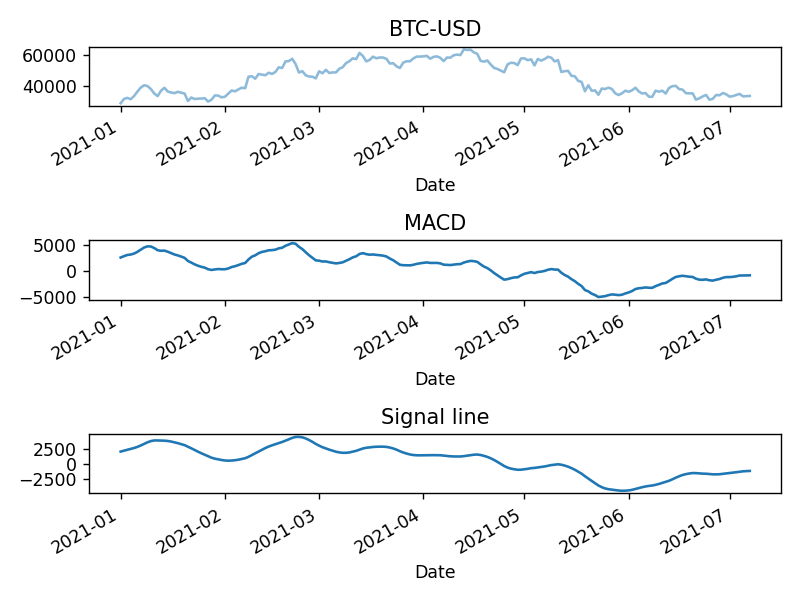

In [117]:
# My way xd
fig, ax = plt.subplots(3,1)
data['Close'].loc['2021-01-01':].plot(ax=ax[0], alpha=0.5, title='BTC-USD')
data['MACD'].loc['2021-01-01':].plot(ax=ax[1], title='MACD')
data['Signal line'].loc['2021-01-01':].plot(ax=ax[2], title='Signal line')
plt.tight_layout()

<IPython.core.display.Javascript object>


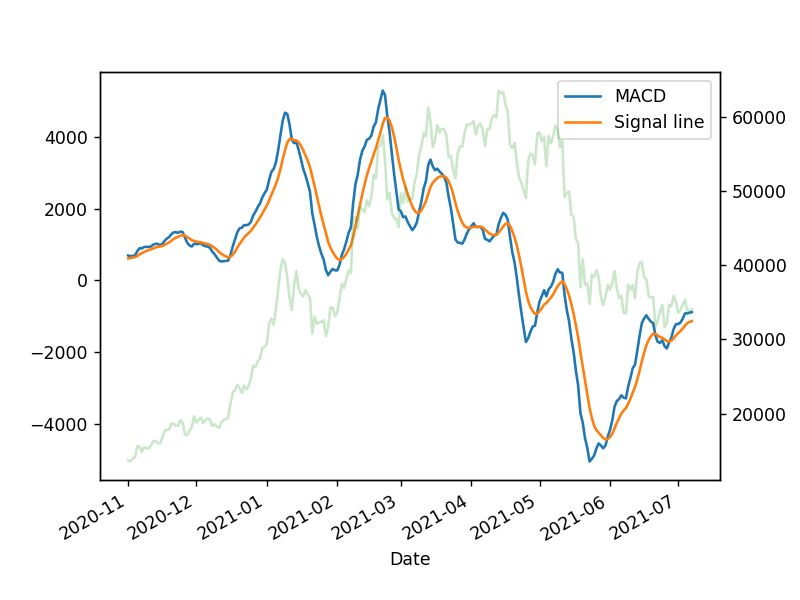

<AxesSubplot:>

In [124]:
# Correct way of plotting the MACD and the Signal line since the price and the indicators are not in the same scale
fig, ax = plt.subplots()
data[['MACD','Signal line']].loc['2020-11-01':].plot(ax=ax)
data['Close'].loc['2020-11-01':].plot(ax=ax, alpha=0.25, secondary_y=True)

### Stochastic oscillator
- Lagging indicator

**Calculations**
- 14-high: Maximum of last 14 trading days
- 14-low: Minimum of last 14 trading days
- %K: (Last close - 14-low)*100/ (14-high - 14-low)
- %D: Simple Moving Average of last 3 days of %K

In [139]:
high14 = data['High'].rolling(14).max()
low14 = data['Low'].rolling(14).min()
data['%K'] = (data['Close'] - low14)*100/(high14-low14)
data['%D'] = data['%K'].rolling(3).mean()

In [140]:
data.tail()

,Open,High,Low,Close,Adj Close,Volume,MACD,Signal line,%K,%D
Date,,,,,,,,,,
2021-07-02,33549.601562,33939.589844,32770.679688,33897.046875,33897.046875,38728974942,-1179.730167,-1417.829103,65.417186,57.880374
2021-07-03,33854.421875,34909.261719,33402.695312,34668.546875,34668.546875,24383958643,-1071.555215,-1348.574326,75.504146,63.754055
2021-07-04,34665.566406,35937.566406,34396.476562,35287.781250,35287.781250,24924307911,-925.193690,-1263.898199,83.600313,74.840548
2021-07-05,35284.343750,35284.343750,33213.660156,33746.003906,33746.003906,26721554282,-922.970247,-1195.712608,63.442378,74.182279
2021-07-07,34153.878906,34363.257812,34001.296875,34013.703125,34013.703125,26784800768,-889.355131,-1134.441113,60.230224,69.090971


<IPython.core.display.Javascript object>


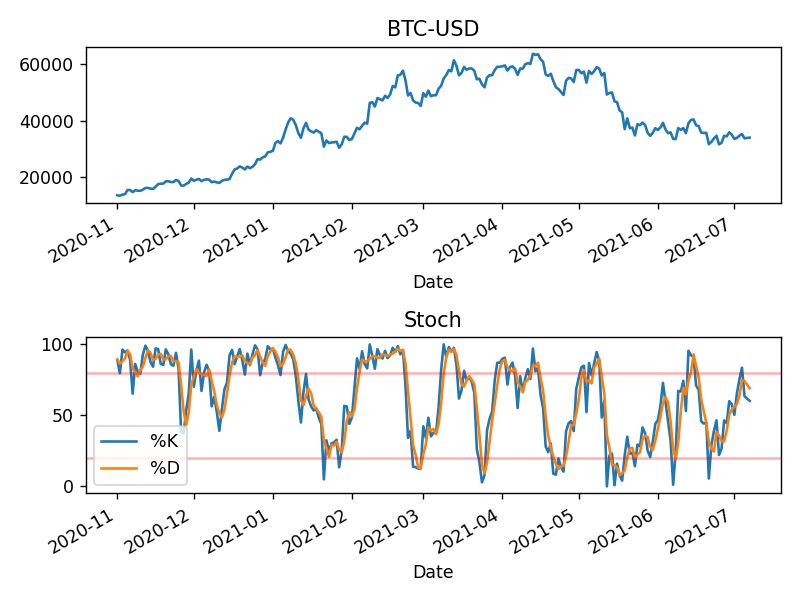

In [145]:
fig, ax = plt.subplots(2,1)
data[['%K','%D']].loc['2020-11-01':].plot(ax=ax[1], title='Stoch')
data['Close'].loc['2020-11-01':].plot(ax=ax[0], title='BTC-USD')
ax[1].axhline(80, c='r', alpha=0.3)
ax[1].axhline(20, c='r', alpha=0.3)
plt.tight_layout()

# daily %

In [65]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib notebook

In [66]:
# The date is used as the index to have a better data navigation
data = pd.read_csv("/home/amaru-razerblade/bigdata-crypto/datos/BTCUSD_day.csv", index_col=0, parse_dates=True)
data = data.reindex(index=data.index[::-1])  # Reorders the indexes of the csv.
data.head()

,Symbol,Open,High,Low,Close,Volume BTC,Volume USD
Date,,,,,,,
2015-10-08,BTCUSD,242.50,245.00,242.5,243.95,18.80,4595.84
2015-10-09,BTCUSD,243.95,249.97,243.6,245.39,30.99,7651.63
2015-10-10,BTCUSD,245.39,246.30,244.6,246.30,12.17,2984.44
2015-10-11,BTCUSD,246.30,249.50,246.3,249.50,12.22,3021.12
2015-10-12,BTCUSD,249.50,249.50,247.6,247.60,38.28,9493.89


In [23]:
# % open -> close
close_to_open_chg = (data['Close'] - data['Open'])/data['Open']*100.0
close_to_open_chg

Date
2015-10-08    0.597938
2015-10-09    0.590285
2015-10-10    0.370838
2015-10-11    1.299229
2015-10-12   -0.761523
                ...   
2020-04-06    8.291256
2020-04-07   -1.842044
2020-04-08    2.329831
2020-04-09   -0.737489
2020-04-10    0.000000
Length: 1647, dtype: float64

In [77]:
data['%Chg'] = close_to_open_chg
data.head()

,Symbol,Open,High,Low,Close,Volume BTC,Volume USD,%Chg
Date,,,,,,,,
2015-10-08,BTCUSD,242.50,245.00,242.5,243.95,18.80,4595.84,0.597938
2015-10-09,BTCUSD,243.95,249.97,243.6,245.39,30.99,7651.63,0.590285
2015-10-10,BTCUSD,245.39,246.30,244.6,246.30,12.17,2984.44,0.370838
2015-10-11,BTCUSD,246.30,249.50,246.3,249.50,12.22,3021.12,1.299229
2015-10-12,BTCUSD,249.50,249.50,247.6,247.60,38.28,9493.89,-0.761523


In [ ]:
new_data= close_to_open_chg

In [24]:
close_to_open_chg.to_csv('/home/amaru-razerblade/bigdata-crypto/datos/DailyChange.csv')

In [78]:
close_to_open_chg.head()

Date
2015-10-08    0.597938
2015-10-09    0.590285
2015-10-10    0.370838
2015-10-11    1.299229
2015-10-12   -0.761523
dtype: float64

In [79]:
data.head()

,Symbol,Open,High,Low,Close,Volume BTC,Volume USD,%Chg
Date,,,,,,,,
2015-10-08,BTCUSD,242.50,245.00,242.5,243.95,18.80,4595.84,0.597938
2015-10-09,BTCUSD,243.95,249.97,243.6,245.39,30.99,7651.63,0.590285
2015-10-10,BTCUSD,245.39,246.30,244.6,246.30,12.17,2984.44,0.370838
2015-10-11,BTCUSD,246.30,249.50,246.3,249.50,12.22,3021.12,1.299229
2015-10-12,BTCUSD,249.50,249.50,247.6,247.60,38.28,9493.89,-0.761523


In [63]:
df_sorted = data.sort_values(by=['%Chg'])

In [87]:
df_sorted.head()

,Symbol,Open,High,Low,Close,Volume BTC,Volume USD,%Chg
Date,,,,,,,,
2020-03-12,BTCUSD,7935.49,7966.08,4600.00,4830.45,18359.23,1.108609e+08,-39.128523
2018-01-16,BTCUSD,13597.60,13601.25,10001.00,11399.01,20640.71,2.421849e+08,-16.168956
2017-09-14,BTCUSD,3855.01,3920.20,3219.89,3242.63,24715.98,8.673915e+07,-15.885303
2018-02-05,BTCUSD,8162.94,8334.00,6500.00,6892.67,22800.02,1.663154e+08,-15.561428
2016-08-02,BTCUSD,606.78,614.38,456.36,515.86,3356.11,1.891926e+06,-14.984014


In [95]:
df_sorted.index[:]

DatetimeIndex(['2020-03-12', '2018-01-16', '2017-09-14', '2018-02-05',
               '2016-08-02', '2018-11-19', '2019-06-27', '2016-01-15',
               '2017-01-05', '2019-07-16',
               ...
               '2020-03-19', '2017-08-05', '2017-09-15', '2019-10-25',
               '2020-03-13', '2017-07-17', '2017-12-06', '2019-04-02',
               '2017-12-07', '2017-07-20'],
              dtype='datetime64[ns]', name='Date', length=1647, freq=None)

In [96]:
df = df_sorted.set_index('%Chg')
df.head()

,Symbol,Open,High,Low,Close,Volume BTC,Volume USD
%Chg,,,,,,,
-39.128523,BTCUSD,7935.49,7966.08,4600.00,4830.45,18359.23,1.108609e+08
-16.168956,BTCUSD,13597.60,13601.25,10001.00,11399.01,20640.71,2.421849e+08
-15.885303,BTCUSD,3855.01,3920.20,3219.89,3242.63,24715.98,8.673915e+07
-15.561428,BTCUSD,8162.94,8334.00,6500.00,6892.67,22800.02,1.663154e+08
-14.984014,BTCUSD,606.78,614.38,456.36,515.86,3356.11,1.891926e+06


In [97]:
df['Date'] = df_sorted.index[:]

In [98]:
df.head()

,Symbol,Open,High,Low,Close,Volume BTC,Volume USD,Date
%Chg,,,,,,,,
-39.128523,BTCUSD,7935.49,7966.08,4600.00,4830.45,18359.23,1.108609e+08,2020-03-12
-16.168956,BTCUSD,13597.60,13601.25,10001.00,11399.01,20640.71,2.421849e+08,2018-01-16
-15.885303,BTCUSD,3855.01,3920.20,3219.89,3242.63,24715.98,8.673915e+07,2017-09-14
-15.561428,BTCUSD,8162.94,8334.00,6500.00,6892.67,22800.02,1.663154e+08,2018-02-05
-14.984014,BTCUSD,606.78,614.38,456.36,515.86,3356.11,1.891926e+06,2016-08-02


In [99]:
df.loc[-3:3]

,Symbol,Open,High,Low,Close,Volume BTC,Volume USD,Date
%Chg,,,,,,,,
-2.981795,BTCUSD,623.45,628.79,591.93,604.86,811.36,493538.52,2016-09-11
-2.970222,BTCUSD,11815.28,12321.01,11205.72,11464.34,3586.66,42115688.50,2019-08-06
-2.952556,BTCUSD,1183.72,1186.69,1126.54,1148.77,2471.08,2854606.79,2017-02-25
-2.928922,BTCUSD,2572.96,2636.55,2429.42,2497.60,6128.04,15611580.85,2017-06-25
-2.923815,BTCUSD,6242.53,6275.00,6051.01,6060.01,2142.24,13260615.29,2018-06-26
...,...,...,...,...,...,...,...,...
2.965084,BTCUSD,649.56,678.55,646.99,668.82,3185.09,2133802.26,2016-10-26
2.967807,BTCUSD,298.20,309.00,298.20,307.05,1219.05,369278.20,2015-10-28
2.972218,BTCUSD,2412.34,2484.04,2375.00,2484.04,8743.25,21120497.79,2017-06-02
